<a href="https://colab.research.google.com/github/AntsaHoneywinner/DSIcapstoneproject/blob/main/Capstone_project_Antsa_Rakotondrafara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Capstone Project

# DSI Program

# Antsa Tantely Fandresena Rakotondrafara


Github [link](https://github.com/AntsaHoneywinner/DSIcapstoneproject/).

Dashboard [link](https://datastudio.google.com/reporting/785bef4b-8c1e-48cd-87a8-c76372f4a0d7).

To access the [GeoData](https://datahub.io/core/geo-countries) of all countries.

Understand [TIMMS](https://timss2019.org/international-database/?_gl=1*e0igog*_ga*MTE1MzU3MjcyNi4xNjQ0ODc5NDUw*_ga_L2FMXN42HR*MTY0NDg3OTUxMy4xLjAuMTY0NDg3OTUxMy4w).

## Regression Analysis  of  Mathematical Achievement using TIMMS 2019 database

I owe thanks to all people who make DSI happen!

Goals :     

-  Merging student, school, home and teacher context data in TIMMS,
- Build machine learning models that can sketch the feature importance while the target is the achievement.
-  Plot all results

## The problem to be solved.


Overview : When creating a NGO to help girls to achieve their goals, we have limited resources. Hence, we need to focus  on the ones that need the help urgently. Predicting the achievement of a given girl and taking the decision to help her immediately or put her in waiting list is very crucial. The purpose of this project is to build a model that can do such decision. Statistical analysis and machine learning projects have been done in the area, even in the user guide of the datasets but not all participating countries have been studied. 


### Dataset used :  [TIMSS (TRENDS IN INTERNATIONAL MATHEMATICS AND SCIENCE STUDY) 2019 International Database](https://timss2019.org/international-database/?_gl=1*e0igog*_ga*MTE1MzU3MjcyNi4xNjQ0ODc5NDUw*_ga_L2FMXN42HR*MTY0NDg3OTUxMy4xLjAuMTY0NDg3OTUxMy4w)


The database includes student achievement data as well as student, home, teacher, school, and national context data for 64 countries and 8 benchmarking participants. TIMSS 2019 is the seventh assessment cycle of TIMSS since 1995, providing 24 years of trends in mathematics and science achievement at the fourth and eighth grades.



We are using machine learning models to predict the average mathematics achievement of fourth  and eight grade students depending on student context, school context, teacher contexct, then  we will visualize the importance.  







#### Tutorials to be considered


For the EDA 

https://medium.com/analytics-vidhya/implementing-linear-regression-using-sklearn-76264a3c073c


For the models

https://www.askpython.com/python/examples/multiple-linear-regression


https://www.sfu.ca/~mjbrydon/tutorials/BAinPy/10_multiple_regression.html

# Loading and preprocessing the data

In [1]:
#@title Mounting my google drive to access the file. { run: "auto", display-mode: "form" }
from google.colab import drive
drive.mount('/content/gdrive') 

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


I created the following path to store all my data in this project, please change here according to your data path.

In [ ]:
ls

gdrive/  sample_data/


In [2]:
cd /content/gdrive/MyDrive/Antsa_Rakotondrafara_Capstone_project/Mydata

/content/gdrive/MyDrive/Antsa_Rakotondrafara_Capstone_project/Mydata


#### Download the data from the TIMMS website.

Please uncomment when running at the first time and comment again after running.

In [ ]:
#@title Downloading the datasets  { run: "auto", display-mode: "form" }
#!wget -P / https://timss2019.org/international-database/downloads/T19_G4_SPSS%20Data.zip
#!wget -P / https://timss2019.org/international-database/downloads/T19_G8_SPSS%20Data.zip
#!wget -P / https://timss2019.org/international-database/downloads/T19_G4_Curriculum%20Data.zip
#!wget -P / https://timss2019.org/international-database/downloads/T19_G8_Curriculum%20Data.zip
#!wget -P / https://timss2019.org/international-database/downloads/T19_G4_Codebooks.zip
#!wget -P / https://timss2019.org/international-database/downloads/T19_G8_Codebooks.zip
#!wget -P / https://timss2019.org/international-database/downloads/T19_G4_Almanacs.zip
#!wget -P / https://timss2019.org/international-database/downloads/T19_G8_Almanacs.zip
#!wget -P / https://timss2019.org/international-database/downloads/T19_G4_TCMA%20Item%20Selection.zip
#!wget -P / https://timss2019.org/international-database/downloads/T19_G8_TCMA%20Item%20Selection.zip

### Download the geo file for the visualization.

Please uncomment the cells in this section when running at the first time and comment again after running.

In [ ]:
#!wget -P / https://datahub.io/core/geo-countries/r/countries.geojson

The following cells was used to unzip the data in drive.

In [ ]:
#@title Unzip the downloaded files. { run: "auto", display-mode: "form" }
#!unzip 'T19_G4_SPSS Data.zip' -d 'T19_G4_SPSS Data'
# !unzip   T19_G4_Almanacs.zip -d  T19_G4_Almanacs
# !unzip   'T19_G4_Curriculum Data.zip' -d  'T19_G4_Curriculum Data'
# !unzip   'T19_G4_TCMA Item Selection.zip' -d  'T19_G4_TCMA Item Selection'
# !unzip   T19_G8_Almanacs.zip -d  T19_G8_Almanacs
# !unzip   T19_G8_Codebooks.zip -d  T19_G8_Codebooks
# !unzip   T19_G4_Codebooks.zip -d  T19_G4_Codebooks
# !unzip   'T19_G8_TCMA Item Selection.zip' -d  'T19_G8_TCMA Item Selection'
#!unzip 'T19_G8_SPSS Data.zip' -d 'T19_G8_SPSS Data'

Remove all the zipped file.

In [ ]:
#@title Remove all zip files { display-mode: "form" }
# #!rm 'T19_G4_SPSS Data.zip'
# !rm T19_G4_Almanacs.zip
# !rm T19_G4_Codebooks.zip
# !rm 'T19_G4_Curriculum Data.zip'
# !rm 'T19_G4_TCMA Item Selection.zip'
# !rm T19_G8_Almanacs.zip
# !rm T19_G8_Codebooks.zip
# !rm 'T19_G8_Curriculum Data.zip'
# !rm 'T19_G8_SPSS Data.zip'
# !rm 'T19_G8_TCMA Item Selection.zip'

### Merge the datasets ; Student context data, Home context data, school context data, teacher context data.

Installing pyreadstat to read ssps file

In [3]:
!pip install pyreadstat

     |████████████████████████████████| 2.5 MB 4.2 MB/s 


Importing requiered librairies.

In [3]:
import pandas as pd
import pyreadstat
from os import walk
import time
import datetime
import numpy as np

In [4]:
def filenames(directory) :
  '''take directory name as input return list of all files'''
  return next(walk(directory), (None, None, []))[2]  # [] if no file

In [5]:
Countries = list( set([ i[3:6]  for i in filenames('T19_G4_SPSS Data')]))
Countries.sort()

In [6]:
len(Countries)

64

In [7]:
def merge_two_dadaframe(df1,df2) :
   '''take two dataframes a sinput and output the merged dataframe'''
   list1 = df1.columns
   list2 = df2.columns
   merge_on = list(set.intersection(set(list1), set(list2)))
   newdf = pd.merge( df1,df2, on = merge_on, suffixes=('',''))
   
   return(newdf.dropna(how='all', axis=1))

In [8]:
def concat_all_data( tmp_list , directory = 'T19_G8_SPSS Data') :
    '''take a list of filename and a directory and return the concatenated dataframe'''
    my_data_list = []
    for filename in tmp_list :
      try :
        my_data_list.append(pd.read_spss(directory +'/' + filename))
      except :
        pass
    df = pd.concat(my_data_list)
    for col in df.columns :
      if 'WGT' in col :
        df = df.drop(columns = [col])
    return( df.dropna(thresh=len(df.index)* 2/3, axis=1) )

In [9]:
#@title list column to remove { run: "auto", display-mode: "form" }
myrange = ['01','02','03','04','05']
columns_to_rm = ( ['SCOPE','VERSION','BSDGICP',
         'WGTADJ1','WGTADJ2','WGTADJ3',
         'WGTFAC1','WGTFAC2','WGTFAC',
         'BSBG05F','BSBG05G','BSBG05H','BSBG05I',
         'BSB21','BSBS22A','BSBS22B','BSBS22D','BSBS22C', 'BSBS22E','BSBS22F', 'BSBS22G','BSBS22I', 'BSBS23A','BSBS23B','BSBS23C','BSBS23D','BSBS23E','BSBS23F','BSBS23G', 'BSBS24A', 'BSBS24B','BSBS24C','BSBS24D','BSBS24E','BSBS24F','BSBS24G','BSBS24H',
'BSBS25A','BSBS25B','BSBS25C','BSBS25D','BSBS25E','BSBS25F','BSBS25G','BSBS25H','BSBS25I', 
'BSBS26AB','BSBS27AB', 'BSBS27BB',
'BSBB21', 'BSBB22', 'BSBB23A',  'BSBB23B', 'BSBB23C', 'BSBB23D', 'BSBB23E', 'BSBB23F', 'BSBB23G', 'BSBB23H', 'BSBB23I',
 'BSBB24A',  'BSBB24B', 'BSBB24C', 'BSBB24D', 'BSBB24E', 'BSBB24F', 'BSBB24G',
 'BSBB25A', 'BSBB25A','BSBB25B','BSBB25C','BSBB25D','BSBB25E','BSBB25F','BSBB25G','BSBB25H',
'BSBE26', 'BSBE27', 'BSBE28A', 'BSBE28B', 'BSBE28C', 'BSBE28D', 'BSBE28E', 'BSBE28F', 'BSBE28G', 'BSBE28H', 'BSBE28I', 'BSBE29A','BSBE29B','BSBE29C','BSBE29D','BSBE29E','BSBE29F','BSBE29G',
'BSBE30A', 'BSBE30B','BSBE30C','BSBE30D','BSBE30E','BSBE30F','BSBE30G','BSBE30H',
'BSBC31', 'BSBC32', 'BSBC33A', 'BSBC33B','BSBC33C','BSBC33D','BSBC33E','BSBC33F','BSBC33G','BSBC33H','BSBC33I', 'BSBC34A', 'BSBC34B','BSBC34C', 'BSBC34D','BSBC34E','BSBC34F', 'BSBC34G',
'BSBC35A', 'BSBC35B','BSBC35C','BSBC35D','BSBC35E','BSBC35F','BSBC35G','BSBC35H',
'BSBP36', 'BSBP37', 'BSBP38B',  'BSBP38C', 'BSBP38D', 'BSBP38E', 'BSBP38F', 'BSBP38G', 'BSBP38H', 'BSBP38I', 'BSBP38A', 
'BSBP39A', 'BSBP39B', 'BSBP39C', 'BSBP39D', 'BSBP39E', 'BSBP39F', 'BSBP39G', 
'BSBP40A', 'BSBP40B', 'BSBP40C', 'BSBP40D', 'BSBP40E', 'BSBP40F', 'BSBP40G', 'BSBP40H', 
'BSBP41A', 'BSBP41B', 'BSBP41C', 'BSBP41D', 'BSBP41E', 'BSBP41F', 'BSBP41G', 'BSBP41H', 'BSBP41I', 
'BSBB42AB', 'BSBE42AC','BSBC42AD','BSBP42AE', 'BSBB42BB','BSBE42BC','BSBC42BD',
'BSBP42BE','BSBS43AB','BSBS43BB', 'BSBGSLS',  'BSDGSLS',  'BSBGICS', 'BSDGICS',
'BSBGSCS', 'BSDBGSCS',  'BSBGSVS', 'BSDGSVS',
'BSDGSLB',  'BSBGSLB', 'BSBGICB', 'BSDGICB', 'BSBGSCB', 'BSDGSCB',
'BSBGSLE', 'BSDGSLE', 
'BSBGICE', 'BSDGICE', 'BSBGSCE', 'BSDGSCE', 'BSBGSLC', 'BSDGSLC',  'BSBGICC',
'BSDGICC', 'BSBGSCC',
 'BSDGSCC', 'BSBGSLP',  'BSDGSLP',
 'BSBGICP',  'BSDGICP',
 'BSBGSCP',
 'BSDGSCP', 'IDBOOK',
 'IDPOP', 'IDGRADER', 'TOTWGT'
       'IDGRADE', 'ITLANG_SQ', 'LCID_SQ', 'ITLANG_SA', 'LCID_SA', 'ITSEX',
       'ITADMINI', 'WGTFAC3', 'JKREP', 'IDLINK',
       'IDGRADE', 'IDSUBJ', 'ITCOURSE', 'MATSUBJ', 'SCISUBJ',
]
       + ['BSSKNO'+myrange[i] for i in range(5)]
        + ['BSSBIO'+myrange[i] for i in range(5)]
        + ['BSMKNO'+myrange[i] for i in range(5)]
        + ['BSMIBM'+myrange[i] for i in range(5)]
        + ['BSSIBM'+myrange[i] for i in range(5)]
        +['BSSENV'+myrange[i] for i in range(5)]
        + ['BSSREA'+myrange[i] for i in range(5) ]
        +['BSSPHY'+myrange[i] for i in range(5) ]
        + ['BSSEAR'+myrange[i] for i in range(5) ]
        +['BSSCHE'+myrange[i] for i in range(5)]
        + ['BSSAPP'+myrange[i] for i in range(5)]      
        + ['BSMREA'+myrange[i] for i in range(5)] 
        + ['BSMNUM'+myrange[i] for i in range(5)]
         + ['BSMGEO'+myrange[i] for i in range(5)]
         + ['BSMDAT'+ myrange[i] for i in range(5)]
         + ['BSMAPP'+ myrange[i] for i in range(5)]
         + ['BSMALG'+ myrange[i] for i in range(5)]
         + ['BSSSCI'+ myrange[i] for i in range(5)]
         +  ['BSSIBM'+ myrange[i] for i in range(5)]
         + ['BSMIBM01','BSMIBM02','BSMIBM03','BSMIBM04','BSMIBM05']
         )


achievement_col =  ['BSMMAT'+ myrange[i] for i in range(5)]
index_cols = ['COUNTRY', 'IDSCHOOL', 'IDCLASS', 'IDSTUD','IDTEACH']


In [10]:
from statistics import mean

In [11]:
test  = pd.read_spss('T19_G8_SPSS Data' +'/' +'bsgsweb7.sav')

In [12]:
def drop_cols(df) :
  for col in columns_to_rm :
    try :
        df = df.drop(columns = [col])
    except : pass
  return df

In [13]:
test = drop_cols(test)

In [14]:
test[achievement_col]

,BSMMAT01,BSMMAT02,BSMMAT03,BSMMAT04,BSMMAT05
0,569.51633,518.33905,523.19754,533.95851,516.23680
1,566.45433,542.41167,569.63464,548.14431,565.42280
2,610.96609,700.67558,637.06737,698.95980,690.36918
3,414.85784,417.21581,423.47393,350.01036,439.36993
4,534.63218,541.16746,527.28159,577.90312,549.52355
...,...,...,...,...,...
1577,566.56835,580.09974,554.66963,539.18886,591.58554
1578,495.62217,477.63712,496.87171,484.00318,507.84728
1579,501.02916,486.40706,490.71665,497.39446,489.97223
1580,427.62173,315.76273,375.69163,379.96520,342.82645


In [15]:
achievement_col

['BSMMAT01', 'BSMMAT02', 'BSMMAT03', 'BSMMAT04', 'BSMMAT05']

In [16]:
def make_achievement_cols(df) :
  '''Take the average of the 5 achievement columns'''
  achiev = []
  for row in df.itertuples():
   achiev.append(mean([row.BSMMAT01, row.BSMMAT02,row.BSMMAT03,row.BSMMAT04,row.BSMMAT05]) )
  df['ACHIEV'] = achiev 
  df = df.drop(columns = achievement_col)
  return df

In [17]:
test = make_achievement_cols(test) 
test.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


,IDCNTRY,IDSCHOOL,IDCLASS,IDSTUD,BSBG01,BSBG03,BSBG04,BSBG05A,BSBG05B,BSBG05C,...,BSBGSCM,BSDGSCM,BSBGSVM,BSDGSVM,BSDGSCS,BSDG05S,BSDGEDUP,BSDMLOWP,BSDSLOWP,ACHIEV
0,752.0,5005.0,500503.0,50050301.0,Boy,Always,Enough to fill one bookcase (26–100 books),Yes,Yes,Yes,...,11.41779,Somewhat Confident in Mathematics,8.34615,Somewhat Value Mathematics,NaN,Both Own Room and Internet Connection,Post-secondary but not University,No,No,532.249646
1,752.0,5005.0,500503.0,50050303.0,Boy,Almost always,Enough to fill one bookcase (26–100 books),Yes,Yes,Yes,...,10.59469,Somewhat Confident in Mathematics,8.12441,Somewhat Value Mathematics,NaN,Both Own Room and Internet Connection,Upper Secondary,No,No,558.413550
2,752.0,5005.0,500503.0,50050304.0,Boy,Always,Enough to fill one bookcase (26–100 books),Yes,Yes,Yes,...,15.85188,Very Confident in Mathematics,13.48293,Strongly Value Mathematics,NaN,Both Own Room and Internet Connection,University or Higher,No,No,667.607604
3,752.0,5005.0,500503.0,50050305.0,Girl,Almost always,Enough to fill one shelf (11–25 books),Yes,Yes,Yes,...,7.67800,Not Confident in Mathematics,8.82228,Somewhat Value Mathematics,NaN,Both Own Room and Internet Connection,University or Higher,No,No,408.985574
4,752.0,5005.0,500503.0,50050307.0,Boy,Always,None or very few (0–10 books),Yes,Yes,Yes,...,9.22591,Not Confident in Mathematics,9.65438,Somewhat Value Mathematics,NaN,Both Own Room and Internet Connection,Don't Know,No,No,546.101580


In [18]:
country_id = pd.read_csv('country_id.csv')
def country(idcntry) :
    try : return ((country_id[country_id['IDCNTRY'] ==idcntry]).iloc[0])['Country']
    except : return 'Not found'


In [19]:
country(62) 

'Not found'

In [20]:
def make_country(df) :
  COUNTRY = []
  for row in df.itertuples():
     COUNTRY.append(country(row.IDCNTRY))
  df['COUNTRY'] = COUNTRY 
  df = df.drop(columns = ['IDCNTRY'])
  return df
   

In [21]:
make_country(test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  """


,IDSCHOOL,IDCLASS,IDSTUD,BSBG01,BSBG03,BSBG04,BSBG05A,BSBG05B,BSBG05C,BSBG05D,...,BSDGSCM,BSBGSVM,BSDGSVM,BSDGSCS,BSDG05S,BSDGEDUP,BSDMLOWP,BSDSLOWP,ACHIEV,COUNTRY
0,5005.0,500503.0,50050301.0,Boy,Always,Enough to fill one bookcase (26–100 books),Yes,Yes,Yes,Yes,...,Somewhat Confident in Mathematics,8.34615,Somewhat Value Mathematics,NaN,Both Own Room and Internet Connection,Post-secondary but not University,No,No,532.249646,Sweden
1,5005.0,500503.0,50050303.0,Boy,Almost always,Enough to fill one bookcase (26–100 books),Yes,Yes,Yes,Yes,...,Somewhat Confident in Mathematics,8.12441,Somewhat Value Mathematics,NaN,Both Own Room and Internet Connection,Upper Secondary,No,No,558.413550,Sweden
2,5005.0,500503.0,50050304.0,Boy,Always,Enough to fill one bookcase (26–100 books),Yes,Yes,Yes,Yes,...,Very Confident in Mathematics,13.48293,Strongly Value Mathematics,NaN,Both Own Room and Internet Connection,University or Higher,No,No,667.607604,Sweden
3,5005.0,500503.0,50050305.0,Girl,Almost always,Enough to fill one shelf (11–25 books),Yes,Yes,Yes,Yes,...,Not Confident in Mathematics,8.82228,Somewhat Value Mathematics,NaN,Both Own Room and Internet Connection,University or Higher,No,No,408.985574,Sweden
4,5005.0,500503.0,50050307.0,Boy,Always,None or very few (0–10 books),Yes,Yes,Yes,Yes,...,Not Confident in Mathematics,9.65438,Somewhat Value Mathematics,NaN,Both Own Room and Internet Connection,Don't Know,No,No,546.101580,Sweden
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,5203.0,520304.0,52030419.0,Boy,Almost always,None or very few (0–10 books),Yes,Yes,No,Yes,...,Very Confident in Mathematics,9.35676,Somewhat Value Mathematics,NaN,Either Own Room or Internet Connection,Don't Know,No,No,566.422424,Sweden
1578,5203.0,520304.0,52030420.0,Girl,Always,Enough to fill two bookcases (101–200 books),Yes,Yes,Yes,Yes,...,Not Confident in Mathematics,8.34615,Somewhat Value Mathematics,NaN,Both Own Room and Internet Connection,Upper Secondary,No,No,492.396292,Sweden
1579,5203.0,520304.0,52030421.0,Boy,Always,Enough to fill one bookcase (26–100 books),Yes,Yes,No,Yes,...,Somewhat Confident in Mathematics,9.35676,Somewhat Value Mathematics,NaN,Either Own Room or Internet Connection,Upper Secondary,No,No,493.103912,Sweden
1580,5203.0,520304.0,52030422.0,Girl,NaN,NaN,No,Yes,Yes,No,...,Not Confident in Mathematics,8.57829,Somewhat Value Mathematics,NaN,Either Own Room or Internet Connection,"Some Primary, Lower Secondary or No School",Yes,Yes,368.373548,Sweden


Make dummy variable for the regression.

In [22]:
def take_care_single_dummy(df) :
  '''make a dummy variable for 2 categories column'''
  column_to_one_dummy = ['BSBG01']
  for column in df.columns :
    if (df[column].nunique() ==2):
        column_to_one_dummy.append(column)
  return(pd.get_dummies(df, columns= column_to_one_dummy ,  drop_first=True)) 

In [23]:
  def take_care_single_dummy2(df) :
    '''make a dummy variable for 2 categories column'''
    column_to_dummy = []
    col_to_check = [ col for col in df.columns if col not in index_cols]
    for column in col_to_check :
      if type(df[column][1]) == str :
                #print('I am done testing if it is a string')

                try : 
                  if df[column].nunique() >= 1:
                    #print('I am done testing if it is more than 3')
                    if df[column].nunique() < 3:
                        #print('I am done testing if it is less than 10')              
                        column_to_dummy.append(column)
                  else : pass
                except : pass
    return(pd.get_dummies(df, columns= column_to_dummy ,  drop_first=True)) 

In [24]:
test  = pd.read_spss('T19_G8_SPSS Data' +'/' +'bsgsweb7.sav')
test = take_care_single_dummy2(test)


In [25]:
test.head()

,IDCNTRY,IDBOOK,IDSCHOOL,IDCLASS,IDSTUD,BSBG03,BSBG04,BSBG05I,BSBG06A,BSBG06B,...,BSBG12D_Yes,BSBG12E_Yes,BSBG12F_Yes,BSBB21_Yes,BSBC31_Yes,BSBP36_Yes,ITSEX_Male,ITADMINI_Teacher from School,BSDMLOWP_Yes,BSDSLOWP_Yes
0,752.0,Booklet 19,5005.0,500503.0,50050301.0,Always,Enough to fill one bookcase (26–100 books),NaN,"<Post-secondary, non-tertiary education—ISCED ...",<Upper secondary education—ISCED Level 3>,...,1,1,0,1,1,1,1,0,0,0
1,752.0,Booklet 21,5005.0,500503.0,50050303.0,Almost always,Enough to fill one bookcase (26–100 books),NaN,<Upper secondary education—ISCED Level 3>,<Upper secondary education—ISCED Level 3>,...,0,0,0,1,1,1,1,0,0,0
2,752.0,Booklet 22,5005.0,500503.0,50050304.0,Always,Enough to fill one bookcase (26–100 books),NaN,<Bachelor’s or equivalent level—ISCED Level 6>,<Bachelor’s or equivalent level—ISCED Level 6>,...,1,1,0,1,0,1,1,0,0,0
3,752.0,Booklet 23,5005.0,500503.0,50050305.0,Almost always,Enough to fill one shelf (11–25 books),NaN,<Short-cycle tertiary education—ISCED Level 5>,<Bachelor’s or equivalent level—ISCED Level 6>,...,1,1,1,1,1,1,0,0,0,0
4,752.0,Booklet 17,5005.0,500503.0,50050307.0,Always,None or very few (0–10 books),NaN,I don’t know,I don’t know,...,1,0,0,1,1,1,1,0,0,0


In [26]:
test['BSBG03'].unique()

['Always', 'Almost always', NaN, 'Sometimes', 'Never']
Categories (4, object): ['Almost always', 'Always', 'Never', 'Sometimes']

In [27]:
def agree_to_number(my_row) :
    ''' This function is used to convert agreement to number'''
    L = ['Disagree a lot', 'Disagree a little','', 'Agree a little','Agree a lot']
    for i in range(len(L)):
         if my_row == L[i] :
             return(i-2) # 
    return 0  

def frequence_to_number(my_row) :
    ''' This function is used to convert frequence to number'''
    freq_dict = {'Never or almost never': 0,
                  'Never' : 0 , 
                 'Always' : 1,
                   'Almost always' : 0.8,
                 'Sometimes' : 0.4,
                  'Once a month' : 0.5, 
                  'Once every two month' : 0.4 ,
                  'Once every two weeks' : 0.6 , 
                  'Almost every day' : 0.9, 
                  'Every day' : 1, 
                  'A few times a year': 0.2 ,
                  'Once or twice a month': 0.6 , 
                  'Once a week' : 0.7,
                  'At least once a week' : 0.7,
                  '1 or 2 times a week': 0.7,
                  '3 or 4 times a week' : 0.8,
                  'Less than once a week' : 0.5
                  }
    try : return(freq_dict[my_row])
    except : return 0


def ownwork_to_number(my_row) :
    ''' This function is used the amount of own work to number'''
    L =  [ 'Never', 'Some lessons', 'About half the lessons', 'Every or almost every lesson']
    for i in range(len(L)):
         if my_row == L[i] :
             return(i)
    return 0   
def books_to_number(my_row) :
    ''' This function is used the amount of book owned to number'''
    L =  [ 'Enough to fill one shelf (11–25 books)', 'Enough to fill one bookcase (26–100 books)', 'None or very few (0–10 books)','Enough to fill two bookcases (101–200 books)', 'Enough to fill three or more bookcases (more than 200)']
    for i in range(len(L)):
         if my_row == L[i] :
             return(i) 
    return 0  

In [28]:
def to_float(a) :
  return(float(a))
to_float('12')

12.0

In [29]:
def take_care_multiple_dummies(df) :
  col_to_drop = []
  try : 
    df['AGE'] = df['BSDAGE'].apply(to_float) 
    df = df.drop(columns = ['BSDAGE']) 
  except : pass 
  column_to_dummy =[]
  
  col_to_check = [ col for col in df.columns if col not in index_cols]
  i = 1 #Counter
  for column in col_to_check :
      try :
        if 'Disagree a little' in (df[column]).unique() :
          df[column + '_agree'] = df[column].apply(agree_to_number)  
          col_to_drop.append(column)
          #print('Agree : pass')

        elif 'Enough to fill one shelf (11–25 books)' in (df[column]).unique() :
          df[column + '_nbr_book'] = df[column].apply(books_to_number)  
          col_to_drop.append(column)
          #print('Book : pass')
        elif 'Some lessons' in df[column].unique() :
          df[column + '_ownworkfreq'] = df[column].apply(ownwork_to_number)  
          col_to_drop.append(column)
          #print('work : pass')
        elif (('Always' in df[column].unique() ) | ('Once a month'  in df[column].unique()) | ('Every day' in df[column].unique()) | ('Once a week' in df[column].unique()) | ('A few times a year' in (df[column]).unique() )):
          df[column + '_freq'] = df[column].apply(frequence_to_number)
          col_to_drop.append(column)
          #print('freq : pass')

        elif type(df[column][1]) == str :
          #print('I am done testing if it is a string')
          if df[column].nunique() >= 1:
            #print('I am done testing if it is more than 3')
            if df[column].nunique() < 10:
                #print('I am done testing if it is less than 10')              
                column_to_dummy.append(column)
        else : pass
        i+=1
      except : pass
  df = pd.get_dummies(df, columns= column_to_dummy ,  drop_first=False)
  
  for col in df.columns :
    if (('don’t know' in col) or ('Not applicable'  in col) | ('Neither' in col) | ('_Not Affected' in col)) :
      col_to_drop.append(col)

  df = df.drop(columns = col_to_drop)
  return( df )

The following cell provide us a function we use to merge the dataset.

In [30]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
columns_to_rm

In [ ]:
ls T19_G8_Codebooks/

eT19PSI_G8_Codebook.xlsx  T19Br_G8_Codebook.xlsx  T19_G8_Codebook.xlsx


In [32]:
columncode = pd.read_excel('T19_G8_Codebooks/T19_G8_Codebook.xlsx', sheet_name =[0,1,2,3,4,5,6] , usecols = 'A:B')

In [33]:
all_column_explained = pd.concat(columncode, ignore_index =True)
all_column_explained.head()

,Variable,Label
0,IDCNTRY,Country ID - Numeric ISO Code
1,IDSCHOOL,School ID
2,BCBG03A,GEN\STUDENTS BACKGROUND\ECONOMIC DISADVA
3,BCBG03B,GEN\STUDENTS BACKGROUND\ECONOMIC AFFLUEN
4,BCBG04,GEN\PERCENT OF STUDENTS <LANG OF TEST>


In [34]:
def explain(col) :
  try : return(all_column_explained[all_column_explained['Variable']== col]['Label'].unique()[0])


  except :return col

In [35]:
index_cols

['COUNTRY', 'IDSCHOOL', 'IDCLASS', 'IDSTUD', 'IDTEACH']

In [36]:
def merge_data_countries( countrylist = Countries, directory = 'T19_G8_SPSS Data', name = 'allfile_merged.csv',target_directory = 'T19_G8_SPSS Data', explain_mode = True, to_dummy = True) :
    '''This function take as input the directory and the country of the dataframe and combine them al in one dataframe. Valid only for G8'''
    start = time.time()

    tmpBCG_list = [ 'bcg' + country+ 'm7.sav' for country in countrylist]
    tmpBSG_list = [ 'bsg' + country+ 'm7.sav' for country in countrylist]
    tmpBST_list = [ 'bst' + country+ 'm7.sav' for country in countrylist]
    tmpBTM_list = [ 'btm' + country+ 'm7.sav' for country in countrylist]
    
    
    # create tmpBCG file 
   
    tmpBCG = concat_all_data(tmpBCG_list)
    tmpBCG = drop_cols(tmpBCG)
    #tmpBCG = make_achievement_cols(tmpBCG) 

    print('tmpBCG created')
    
    tmpBSG = concat_all_data(tmpBSG_list)
    tmpBSG = drop_cols(tmpBSG)

    print('tmpBSG created')
    
    tmpBST = concat_all_data(tmpBST_list)
    tmpBST = drop_cols(tmpBST)

    print('tmpBST created')
    
    tmpBTM = concat_all_data( tmpBTM_list)
    tmpBTM =drop_cols(tmpBTM)

    # delete every temporary dataframe each time they are used
    del tmpBCG_list
    del tmpBSG_list
    del tmpBST_list
    del tmpBTM_list
    print('temporary list deleted')
    # Merging 
      
    
    tmpBSTBTM =  merge_two_dadaframe(tmpBST,tmpBTM)

    del tmpBST
    del tmpBTM
    print('tmpBSTBSTM created, tmpBST and tmpBTM deleted')

    
    tmpBCGBSG  = merge_two_dadaframe(tmpBSG,tmpBCG)

    del tmpBSG
    del tmpBCG
    print('tmpBCGBSG created, tmpBSG and tmpBCG deleted')

    tmpBCGBSGBSTBTM = merge_two_dadaframe(tmpBSTBTM,tmpBCGBSG)

    del tmpBSTBTM
    del tmpBCGBSG

    tmpBCGBSGBSTBTM = make_country(tmpBCGBSGBSTBTM)
    print('change country ; Done')
    tmpBCGBSGBSTBTM = make_achievement_cols(tmpBCGBSGBSTBTM)
    print('achievement : Done')

    if explain_mode :

      for col in list(tmpBCGBSGBSTBTM.columns) :
        #print(col)

        if (col not in index_cols) :
          try :tmpBCGBSGBSTBTM.rename(columns = {col : explain(col)}, inplace = True)
          except : pass

    try : 
      tmpBCGBSGBSTBTM = tmpBCGBSGBSTBTM.drop(columns = ['NMTEACH',	'NSTEACH','NTEACH',	'JKZONE','IDTEALIN'])
    except : pass


    tmpBCGBSGBSTBTM['IDSCHOOL'] = tmpBCGBSGBSTBTM['IDSCHOOL'].astype(int,errors='ignore')
    tmpBCGBSGBSTBTM['IDCLASS'] = tmpBCGBSGBSTBTM['IDCLASS'].astype(int,errors='ignore')
    tmpBCGBSGBSTBTM['IDSTUD'] = tmpBCGBSGBSTBTM['IDSTUD'].astype(int,errors='ignore')
    tmpBCGBSGBSTBTM['IDTEACH'] = tmpBCGBSGBSTBTM['IDTEACH'].astype(int,errors='ignore')
    for col in columns_to_rm :
      try : 
        tmpBCGBSGBSTBTM = tmpBCGBSGBSTBTM.drop(columns = [col])
      except : pass

    
    #print('achievement : done')


    #tmpBCGBSGBSTBTM = take_care_single_dummy2(tmpBCGBSGBSTBTM)
    print('Dummy one variable ; Done')
    if to_dummy : tmpBCGBSGBSTBTM = take_care_multiple_dummies(tmpBCGBSGBSTBTM)
    print('Dummies other variable ; Done')


    

    
    print('tmpBCGBSGBSABSTBTM created, tmpBSTBTM and tmpBCGBSGBSA deleted')

    #countrylists = [ '_'+ country+'_' for country in countrylist]
    #name =  directory +'_merged.csv'
    tmpBCGBSGBSTBTM.to_csv(name)
    end = time.time()
    print( "csv file saved to "+ name)
    print("The time used to merge the data : ")
    convert = str(datetime.timedelta(seconds = end - start))
    print(convert)
     
    return(tmpBCGBSGBSTBTM, name) 

Merge the data

In [37]:
test_data_set = merge_data_countries( countrylist = ['usa','tur'], name = 'usaexplainedtest.csv' )

tmpBCG created
tmpBSG created
tmpBST created
temporary list deleted
tmpBSTBSTM created, tmpBST and tmpBTM deleted
tmpBCGBSG created, tmpBSG and tmpBCG deleted
change country ; Done
achievement : Done
Dummy one variable ; Done
Dummies other variable ; Done
tmpBCGBSGBSABSTBTM created, tmpBSTBTM and tmpBCGBSGBSA deleted
csv file saved to usaexplainedtest.csv
The time used to merge the data : 
0:00:40.901275


In [38]:
test_data_set[0].head()

,IDSCHOOL,IDCLASS,IDSTUD,Teacher ID and Link,IDTEACH,Number of Math Teachers for Student,Number of Science Teachers for Student,Number of Teachers,JACKKNIFE ZONE,GEN\YEARS BEEN TEACHING,...,School Discipline Problems-Prncpl/IDX_Moderate to Severe Problems,School Emph on Acad Success-Prncpl/IDX_High Emphasis,School Emph on Acad Success-Prncpl/IDX_Medium Emphasis,School Emph on Acad Success-Prncpl/IDX_Very High Emphasis,Instr Aff by Mat Res Shortage-Prncpl/IDX_Affected,Instr Aff by Mat Res Shortage-Prncpl/IDX_Affected A Lot,Instr Aff by Sci Res Shortage-Prncpl/IDX_Affected,Instr Aff by Sci Res Shortage-Prncpl/IDX_Affected A Lot,School Composition by Socioeconomic Background_More Affluent,School Composition by Socioeconomic Background_More Disadvantaged
0,5001,500104,50010403,50010101.0,500101,1.0,1.0,2.0,11.0,15.0,...,0,0,0,1,0,0,0,0,0,0
1,5001,500104,50010404,50010101.0,500101,1.0,1.0,2.0,11.0,15.0,...,0,0,0,1,0,0,0,0,0,0
2,5001,500104,50010405,50010101.0,500101,1.0,1.0,2.0,11.0,15.0,...,0,0,0,1,0,0,0,0,0,0
3,5001,500104,50010406,50010101.0,500101,1.0,1.0,2.0,11.0,15.0,...,0,0,0,1,0,0,0,0,0,0
4,5001,500104,50010407,50010101.0,500101,1.0,1.0,2.0,11.0,15.0,...,0,0,0,1,0,0,0,0,0,0


In [39]:
#explained_final_data_set = merge_data_countries(name = 'explained.csv', to_dummy =False)

tmpBCG created
tmpBSG created
tmpBST created
temporary list deleted
tmpBSTBSTM created, tmpBST and tmpBTM deleted
tmpBCGBSG created, tmpBSG and tmpBCG deleted
change country ; Done
achievement : Done
Dummy one variable ; Done
Dummies other variable ; Done
tmpBCGBSGBSABSTBTM created, tmpBSTBTM and tmpBCGBSGBSA deleted
csv file saved to explained
The time used to merge the data : 
0:10:43.405676


In [40]:
ls

 allfile_merged.csv   'T19_G4_Curriculum Data'/
 countries.geojson    'T19_G4_SPSS Data'/
 country_id.csv       'T19_G4_TCMA Item Selection'/
 data_small_chuncks/   T19_G8_Almanacs/
 explained             T19_G8_Codebooks/
 mergedtest.csv       'T19_G8_SPSS Data'/
 T19_G4_Almanacs/     'T19_G8_TCMA Item Selection'/
 T19_G4_Codebooks/     usaexplainedtest.csv


In [42]:
explained_final_data_set =  pd.read_csv( 'explained.csv' )

explained_final_data_set.head()

,Unnamed: 0,IDSCHOOL,IDCLASS,IDSTUD,Teacher ID and Link,IDTEACH,Number of Math Teachers for Student,Number of Science Teachers for Student,Number of Teachers,JACKKNIFE ZONE,...,Instr Aff by Mat Res Shortage-Prncpl/SCL,Instr Aff by Sci Res Shortage-Prncpl/SCL,School Discipline Problems-Prncpl/IDX,School Emph on Acad Success-Prncpl/IDX,Instr Aff by Mat Res Shortage-Prncpl/IDX,Instr Aff by Sci Res Shortage-Prncpl/IDX,School Composition by Socioeconomic Background,Total Instructional Hours per Year,COUNTRY,ACHIEV
0,0,5001,500102,50010201,50010101.0,500101,1.0,1.0,2.0,31.0,...,14.25596,14.57241,Minor Problems,Medium Emphasis,Not Affected,Not Affected,Neither More Affluent nor More Disadvantaged,1350.0,UnitedArabEmirates,550.550842
1,1,5001,500102,50010202,50010101.0,500101,1.0,1.0,2.0,31.0,...,14.25596,14.57241,Minor Problems,Medium Emphasis,Not Affected,Not Affected,Neither More Affluent nor More Disadvantaged,1350.0,UnitedArabEmirates,326.129702
2,2,5001,500102,50010203,50010101.0,500101,1.0,1.0,2.0,31.0,...,14.25596,14.57241,Minor Problems,Medium Emphasis,Not Affected,Not Affected,Neither More Affluent nor More Disadvantaged,1350.0,UnitedArabEmirates,393.169444
3,3,5001,500102,50010204,50010101.0,500101,1.0,1.0,2.0,31.0,...,14.25596,14.57241,Minor Problems,Medium Emphasis,Not Affected,Not Affected,Neither More Affluent nor More Disadvantaged,1350.0,UnitedArabEmirates,489.828648
4,4,5001,500102,50010207,50010101.0,500101,1.0,1.0,2.0,31.0,...,14.25596,14.57241,Minor Problems,Medium Emphasis,Not Affected,Not Affected,Neither More Affluent nor More Disadvantaged,1350.0,UnitedArabEmirates,461.342258


Here is how to load the final merged data after its construction. This data set will be the one used in the models, however, we will use the explained one in Datastudio because it is easy to read there. Also, we did not put the variables into dummy because Data Studio can handle them alone.

In [154]:
final_data_set =  pd.read_csv( 'allfile_merged.csv' )
final_data_set.head()

,Unnamed: 0,IDSCHOOL,IDCLASS,IDSTUD,IDTEACH,BTBG01,BTBG10,BTBG11,BTBM14,ITLANG_T,...,BCDGDAS_Moderate to Severe Problems,BCDGEAS_High Emphasis,BCDGEAS_Medium Emphasis,BCDGEAS_Very High Emphasis,BCDGMRS_Affected,BCDGMRS_Affected A Lot,BCDGSRS_Affected,BCDGSRS_Affected A Lot,BCDGSBC_More Affluent,BCDGSBC_More Disadvantaged
0,0,5001,500102,50010201,500101,17.0,40.0,18.0,NaN,English,...,0,0,1,0,0,0,0,0,0,0
1,1,5001,500102,50010202,500101,17.0,40.0,18.0,NaN,English,...,0,0,1,0,0,0,0,0,0,0
2,2,5001,500102,50010203,500101,17.0,40.0,18.0,NaN,English,...,0,0,1,0,0,0,0,0,0,0
3,3,5001,500102,50010204,500101,17.0,40.0,18.0,NaN,English,...,0,0,1,0,0,0,0,0,0,0
4,4,5001,500102,50010207,500101,17.0,40.0,18.0,NaN,English,...,0,0,1,0,0,0,0,0,0,0


#### Excel files that go to Google Data Studio.

In [ ]:
#list of all column without the index column


# Exploratory Data analysis.


Tutorial used in this EDA  :

[this one](https://www.analyticsvidhya.com/blog/2021/04/20-must-known-pandas-function-for-exploratory-data-analysis-eda/)


Also [Panda profiling](https://www.kdnuggets.com/2021/02/pandas-profiling-one-line-magical-code-eda.html)



### Panda profiling

### Number of student, teacher, school per country. (Choroplet)

### Mean age, achievement per country, (Choroplet)

### Student gender per country  (Choroplet)

#### Preprocessing the data prior to putting in database

Now let us preprocess the data by changing the type of variables.

## Building a regression model

For this twist challenge, let us use Random forest regressor.

### Splitting the data into train and test.

In [ ]:
L = data_USA.columns

In [ ]:
L = L.drop('target')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( data_USA[L], data_USA['target'], test_size=0.2, random_state=42)

In [ ]:
X_train.head()

,IDCNTRY,ASBG10E,ASBG11F,ASBM01,ASDAGE,ASBS08D,ASBG04,ITSEX_Male,ASBG05C_Yes,ASBG05D_Yes
3758,840.0,2,3,2,10.33,3,1,1,1,1
3093,840.0,3,3,3,10.08,3,1,1,1,1
2223,840.0,3,0,3,10.25,2,3,1,1,1
9302,840.0,3,0,2,10.08,3,1,0,1,1
7831,840.0,3,1,1,9.83,1,1,1,1,1


In [ ]:
y_train.head()

3758    500.902970
3093    599.405774
2223    531.362990
9302    560.740720
7831    426.118330
Name: target, dtype: float64

### Loading the model

In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)


### Training the model

In [ ]:
 # fit the regressor with x and y data
regressor.fit(X_train, y_train) 

RandomForestRegressor(random_state=0)

### Feature importance and prediction

In [ ]:
import time
import numpy as np

start_time = time.time()
importances = regressor.feature_importances_
std = np.std([tree.feature_importances_ for tree in regressor.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.036 seconds


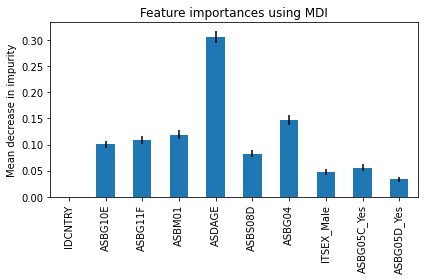

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


forest_importances = pd.Series(importances, index=L)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
forest_importances

IDCNTRY        0.000000
ASBG10E        0.100363
ASBG11F        0.108055
ASBM01         0.119141
ASDAGE         0.306218
ASBS08D        0.082764
ASBG04         0.146251
ITSEX_Male     0.048129
ASBG05C_Yes    0.055608
ASBG05D_Yes    0.033472
dtype: float64

In [ ]:
list(forest_importances)

[0.0,
 0.10036294823363204,
 0.10805461659440871,
 0.11914050206247966,
 0.30621826432586946,
 0.08276419121267217,
 0.14625061827982055,
 0.048129065166746525,
 0.0556078414677752,
 0.03347195265659578]

In [ ]:
importance = pd.DataFrame(forest_importances, columns = ['USA'])

In [ ]:
importance

,USA
IDCNTRY,0.000000
ASBG10E,0.100363
ASBG11F,0.108055
ASBM01,0.119141
ASDAGE,0.306218
ASBS08D,0.082764
ASBG04,0.146251
ITSEX_Male,0.048129
ASBG05C_Yes,0.055608
ASBG05D_Yes,0.033472


In [ ]:
from sklearn.inspection import permutation_importance

start_time = time.time()
result = permutation_importance(
    regressor, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2
)
elapsed_time = time.time() - start_time
print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

forest_importances = pd.Series(result.importances_mean, index=L)

Elapsed time to compute the importances: 7.127 seconds


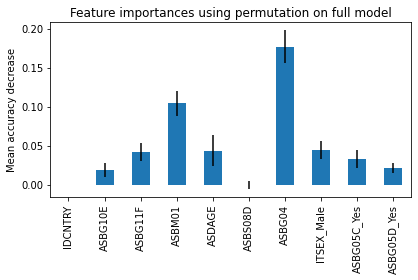

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [ ]:
# Doing the same thing for Turkey

Xtur_train, Xtur_test, ytur_train, ytur_test = train_test_split( data_TUR[L], data_TUR['target'], test_size=0.2, random_state=42)

In [ ]:
regressortur = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressortur.fit(Xtur_train, ytur_train) 
importancestur = regressortur.feature_importances_
forest_importancestur = pd.Series(importancestur, index=L)



In [ ]:
importancetur = pd.DataFrame(forest_importancestur, columns =['TUR'])

In [ ]:
importancetur

,TUR
IDCNTRY,0.000000
ASBG10E,0.069465
ASBG11F,0.089420
ASBM01,0.146794
ASDAGE,0.302076
ASBS08D,0.073222
ASBG04,0.143912
ITSEX_Male,0.059700
ASBG05C_Yes,0.062765
ASBG05D_Yes,0.052645


In [ ]:
importancerf = pd.concat([importance,importancetur], axis=1)

In [ ]:
importancerf

,USA,TUR
IDCNTRY,0.000000,0.000000
ASBG10E,0.100363,0.069465
ASBG11F,0.108055,0.089420
ASBM01,0.119141,0.146794
ASDAGE,0.306218,0.302076
ASBS08D,0.082764,0.073222
ASBG04,0.146251,0.143912
ITSEX_Male,0.048129,0.059700
ASBG05C_Yes,0.055608,0.062765
ASBG05D_Yes,0.033472,0.052645


In [ ]:
importancerf.columns

Index(['USA', 'TUR'], dtype='object')

In [ ]:
L

Index(['IDCNTRY', 'ASBG10E', 'ASBG11F', 'ASBM01', 'ASDAGE', 'ASBS08D',
       'ASBG04', 'ITSEX_Male', 'ASBG05C_Yes', 'ASBG05D_Yes'],
      dtype='object')

In [ ]:
cols = { 'IDCNTRY' : 'IDCNTRY', 'ASBG10E' : 'ASBG10E', 'ASBG11F' : 'ASBG11F', 'ASBM01' : 'ASBM01', 'ASDAGE' : 'ASDAGE', 'ASBS08D' : 'ASBS08D',
       'ASBG04' : 'ASBG04', 'ITSEX_Male' : 'ITSEX_Male', 'ASBG05C_Yes' : 'ASBG05C_Yes', 'ASBG05D_Yes': 'ASBG05D_Yes'}
colcol = pd.Series(data=cols, index=L)

In [ ]:
colcol

IDCNTRY            IDCNTRY
ASBG10E            ASBG10E
ASBG11F            ASBG11F
ASBM01              ASBM01
ASDAGE              ASDAGE
ASBS08D            ASBS08D
ASBG04              ASBG04
ITSEX_Male      ITSEX_Male
ASBG05C_Yes    ASBG05C_Yes
ASBG05D_Yes    ASBG05D_Yes
dtype: object

In [ ]:
coltodata = pd.DataFrame(colcol, columns =['COL'])

In [ ]:
importancerf = pd.concat([importancerf,coltodata], axis=1)

In [ ]:
importancerf

,USA,TUR,COL
IDCNTRY,0.000000,0.000000,IDCNTRY
ASBG10E,0.100363,0.069465,ASBG10E
ASBG11F,0.108055,0.089420,ASBG11F
ASBM01,0.119141,0.146794,ASBM01
ASDAGE,0.306218,0.302076,ASDAGE
ASBS08D,0.082764,0.073222,ASBS08D
ASBG04,0.146251,0.143912,ASBG04
ITSEX_Male,0.048129,0.059700,ITSEX_Male
ASBG05C_Yes,0.055608,0.062765,ASBG05C_Yes
ASBG05D_Yes,0.033472,0.052645,ASBG05D_Yes


In [ ]:
importancecsv = importancerf.to_csv('importance1.csv')

### Making prediction

In [ ]:
y_pred = regressor.predict(X_test)

### Showing our result in the dashboard.

In [ ]:
test_list3 = [1, 4, 5, 6, 5]
test_list4 = [3, 5, 7, 2, 5]
  
# using + operator to concat
test_list3 = test_list3 + test_list4

In [ ]:
test_list3

[1, 4, 5, 6, 5, 3, 5, 7, 2, 5]